# Baseline

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2765 - val_loss: 0.1935
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1728 - val_loss: 0.1547
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1451 - val_loss: 0.1344
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1290 - val_loss: 0.1216
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1185 - val_loss: 0.1131
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1113 - val_loss: 0.1072
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1064 - val_loss: 0.1031
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1028 - val_loss: 0.1000
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1001 - val_loss: 0.0977
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0981 - val_loss: 0.0960
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0966 - val_loss: 0.0948
Epoch 12/50
235/235 ━━━━━━

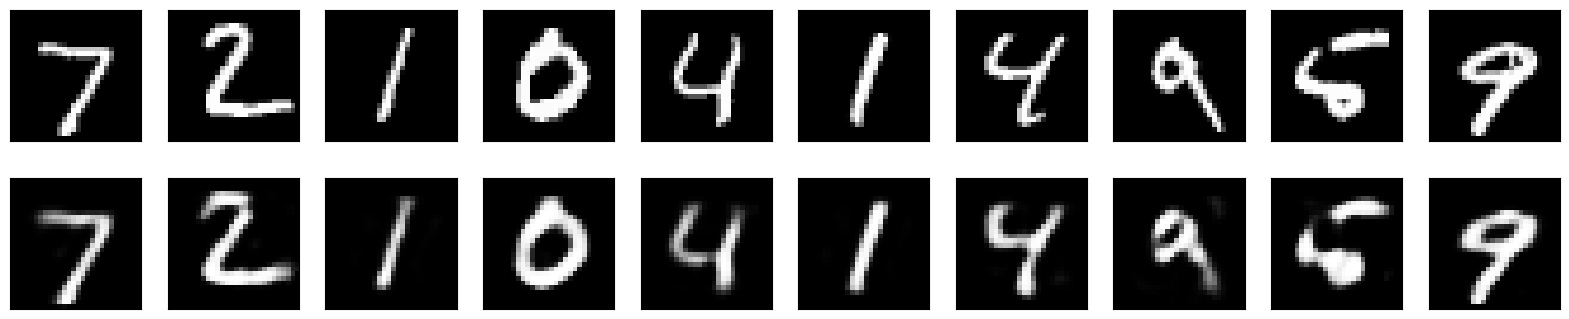

In [5]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
# ---------------------------------------------------------------
# Part 2: use different epoch sizes (5, 10, 20, 30, 40, 50, 100)
# epoch sizes to compare test loss.
# ---------------------------------------------------------------
def build_simple_autoencoder(encoding_dim_local=32):
    # builds a fresh simple autoencoder model with the same structure
    input_img_local = Input(shape=(784,))
    encoded_local = Dense(encoding_dim_local, activation='relu')(input_img_local)
    decoded_local = Dense(784, activation='sigmoid')(encoded_local)
    autoencoder_local = Model(input_img_local, decoded_local)
    autoencoder_local.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder_local

epoch_list = [5, 10, 20, 30, 40, 50, 100]
epoch_results = []

In [7]:
print("\n================ Part 2: Epoch variation experiments ================")
for num_epochs in epoch_list:
    print("\n=== Training simple autoencoder for %d epochs ===" % num_epochs)
    ae = build_simple_autoencoder(encoding_dim)
    ae.fit(x_train, x_train,
           epochs=num_epochs,
           batch_size=256,
           shuffle=True,
           validation_data=(x_test, x_test),
           verbose=0)
    test_loss = ae.evaluate(x_test, x_test, verbose=0)
    epoch_results.append((num_epochs, test_loss))
    print("Test loss after %d epochs: %.6f" % (num_epochs, test_loss))

print("\nSummary of Part 2 (epochs vs test loss):")
for num_epochs, loss_val in epoch_results:
    print("  epochs = %3d  ->  test loss = %.6f" % (num_epochs, loss_val))


================ Part 2: Epoch variation experiments ================

=== Training simple autoencoder for 5 epochs ===
Test loss after 5 epochs: 0.112133

=== Training simple autoencoder for 10 epochs ===
Test loss after 10 epochs: 0.095779

=== Training simple autoencoder for 20 epochs ===
Test loss after 20 epochs: 0.092078

=== Training simple autoencoder for 30 epochs ===
Test loss after 30 epochs: 0.091838

=== Training simple autoencoder for 40 epochs ===
Test loss after 40 epochs: 0.091463

=== Training simple autoencoder for 50 epochs ===
Test loss after 50 epochs: 0.091550

=== Training simple autoencoder for 100 epochs ===
Test loss after 100 epochs: 0.091453

Summary of Part 2 (epochs vs test loss):
  epochs =   5  ->  test loss = 0.112133
  epochs =  10  ->  test loss = 0.095779
  epochs =  20  ->  test loss = 0.092078
  epochs =  30  ->  test loss = 0.091838
  epochs =  40  ->  test loss = 0.091463
  epochs =  50  ->  test loss = 0.091550
  epochs = 100  ->  test loss = 

In [8]:
# ---------------------------------------------------------------
# Part 3: use different numbers of layers (2, 3, 4, 5)
# define encoder layer configurations:
#   2 layers: [32]
#   3 layers: [128, 32]
#   4 layers: [256, 128, 32]
#   5 layers: [256, 128, 64, 32]
# The decoder mirrors these layers.
# ---------------------------------------------------------------
def build_deep_autoencoder(layer_sizes):
    input_img_local = Input(shape=(784,))

    # encoder part
    x = input_img_local
    for size in layer_sizes:
        x = Dense(size, activation='relu')(x)
    encoded_local = x

    # decoder part (mirror, excluding last layer size)
    for size in layer_sizes[-2::-1]:
        x = Dense(size, activation='relu')(x)

    decoded_local = Dense(784, activation='sigmoid')(x)

    autoencoder_local = Model(input_img_local, decoded_local)
    autoencoder_local.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder_local

layer_configs = {
    2: [32],
    3: [128, 32],
    4: [256, 128, 32],
    5: [256, 128, 64, 32],
}


================ Part 3: Layer depth experiments ================

=== Deep autoencoder with 2 encoder layers [32] ===
Test loss with 2 layers: 0.091579

=== Deep autoencoder with 3 encoder layers [128, 32] ===
Test loss with 3 layers: 0.083922

=== Deep autoencoder with 4 encoder layers [256, 128, 32] ===
Test loss with 4 layers: 0.078127

=== Deep autoencoder with 5 encoder layers [256, 128, 64, 32] ===
Test loss with 5 layers: 0.081599

Summary of Part 3 (number of layers vs test loss):
  layers = 2  ->  test loss = 0.091579
  layers = 3  ->  test loss = 0.083922
  layers = 4  ->  test loss = 0.078127
  layers = 5  ->  test loss = 0.081599

Showing sample reconstructions for the 5-layer deep autoencoder (Part 3 visualization)...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


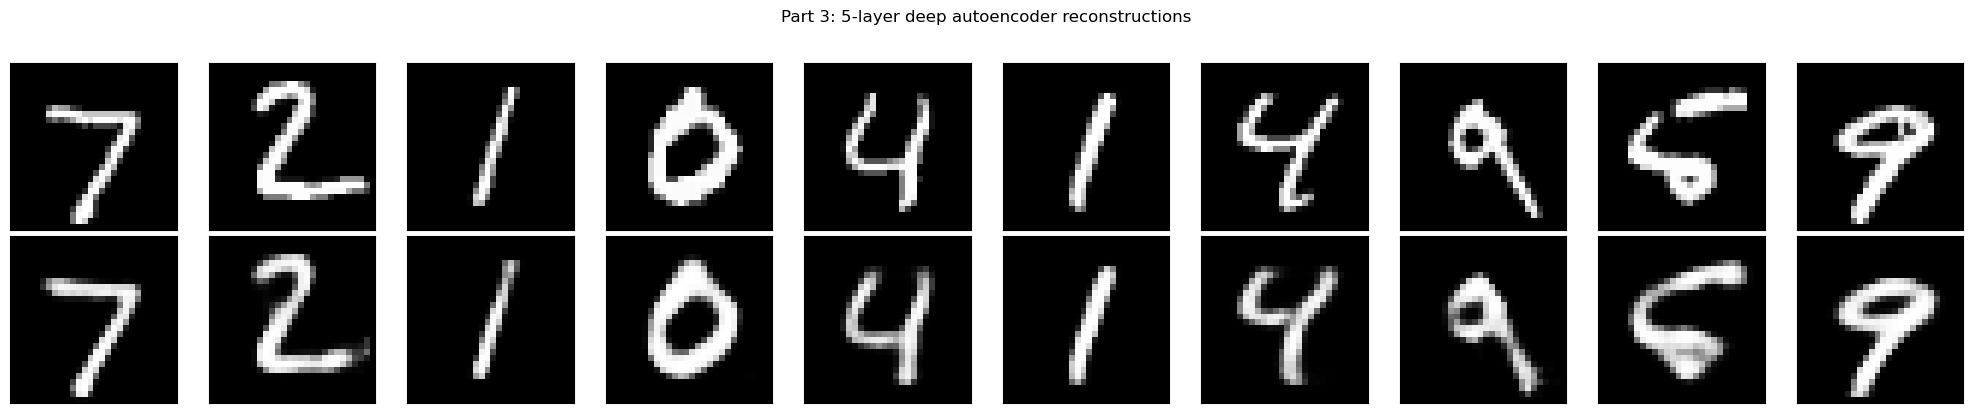

In [9]:
deep_results = {}

fixed_epochs_for_layers = 50 # fixed number of epochs for Part 3 experiments
print("\n================ Part 3: Layer depth experiments ================")
for num_layers, layer_sizes in layer_configs.items():
    print("\n=== Deep autoencoder with %d encoder layers %s ===" % (num_layers, str(layer_sizes)))
    deep_ae = build_deep_autoencoder(layer_sizes)
    deep_ae.fit(x_train, x_train,
                epochs=fixed_epochs_for_layers,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=0)
    test_loss = deep_ae.evaluate(x_test, x_test, verbose=0)
    deep_results[num_layers] = test_loss
    print("Test loss with %d layers: %.6f" % (num_layers, test_loss))

print("\nSummary of Part 3 (number of layers vs test loss):")
for num_layers, loss_val in sorted(deep_results.items()):
    print("  layers = %d  ->  test loss = %.6f" % (num_layers, loss_val))

if 5 in layer_configs:
    print("\nShowing sample reconstructions for the 5-layer deep autoencoder (Part 3 visualization)...")
    deep_ae_5 = build_deep_autoencoder(layer_configs[5])
    deep_ae_5.fit(x_train, x_train,
                  epochs=fixed_epochs_for_layers,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test, x_test),
                  verbose=0)

    decoded_imgs_deep = deep_ae_5.predict(x_test)

    n_vis = 10
    plt.figure(figsize=(20, 4))
    for i in range(n_vis):
        # original
        ax = plt.subplot(2, n_vis, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # deep reconstruction
        ax = plt.subplot(2, n_vis, i + 1 + n_vis)
        plt.imshow(decoded_imgs_deep[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle("Part 3: 5-layer deep autoencoder reconstructions", y=1.02)
    plt.tight_layout()
    plt.show()

In [12]:
# ---------------------------------------------------------------
# Part 4: anomaly detection using the autoencoder
#
# 4a) You place some non-MNIST images (animals, furniture, cars, etc.)
#     into a folder, e.g., "anomaly_images".
# 4b) This code converts them to grayscale 28x28 images, and flattens
#     to 784-d vectors (same format as MNIST).
# 4c) The images are passed through the autoencoder trained on MNIST.
#     We compute reconstruction error (MSE) for each and visualize
#     original vs reconstructed vs difference.
# ---------------------------------------------------------------
from PIL import Image
import glob
import os

def load_anomaly_images(folder="anomaly_images"):
    """
    Code added for Part 4:
    Loads external images from the given folder, converts them to
    grayscale 28x28, normalizes to [0,1], and reshapes to (N, 784).
    Returns:
        X_anom: numpy array of shape (N, 784)
        filenames: list of corresponding filenames
    """
    imgs = []
    filenames = []

    for path in glob.glob(os.path.join(folder, "*")):
        try:
            img = Image.open(path).convert("L")  # grayscale
            img = img.resize((28, 28))          # same size as MNIST
            arr = np.array(img).astype('float32') / 255.
            imgs.append(arr.reshape(28 * 28))
            filenames.append(os.path.basename(path))
        except Exception as e:
            print("Skipping %s because %s" % (path, e))

    if len(imgs) == 0:
        raise ValueError("No valid images found in folder: %s" % folder)

    X_anom = np.stack(imgs, axis=0)
    return X_anom, filenames


================ Part 4: Anomaly image detection ================
Loaded anomaly images: ['Car.jpg', 'Cat.jpg', 'Chair.jpg', 'Dog.jpeg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Reconstruction MSE for each anomaly image (higher = more anomalous):
  Car.jpg                    MSE = 0.162555
  Cat.jpg                    MSE = 0.418077
  Chair.jpg                  MSE = 0.661276
  Dog.jpeg                   MSE = 0.396729


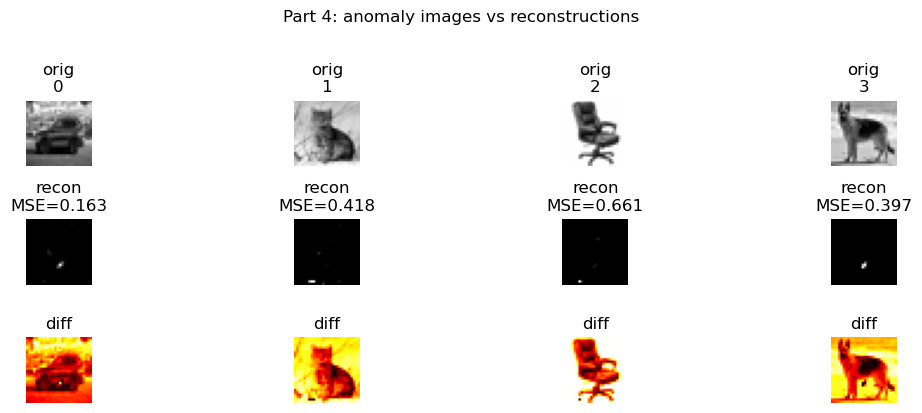

In [ ]:
print("\n================ Part 4: Anomaly image detection ================")
try:
    # load anomaly images from folder (you must place images there yourself)
    X_anom, anomaly_filenames = load_anomaly_images("anomaly_images")
    print("Loaded anomaly images: %s" % str(anomaly_filenames))

    # use the simple autoencoder that was already trained above on MNIST
    reconstructed_anom = autoencoder.predict(X_anom)

    # compute mean squared error per image as anomaly score
    mse = np.mean((X_anom - reconstructed_anom) ** 2, axis=1)

    print("\nReconstruction MSE for each anomaly image (higher = more anomalous):")
    for name, err in zip(anomaly_filenames, mse):
        print("  %-25s  MSE = %.6f" % (name, err))

    # visualize original, reconstruction, and absolute difference
    n_anom = len(X_anom)
    plt.figure(figsize=(12, 4))
    for i in range(n_anom):
        # original anomaly image
        ax = plt.subplot(3, n_anom, i + 1)
        plt.imshow(X_anom[i].reshape(28, 28), cmap='gray')
        ax.set_title("orig\n%d" % i)
        ax.axis('off')

        # reconstructed image
        ax = plt.subplot(3, n_anom, i + 1 + n_anom)
        plt.imshow(reconstructed_anom[i].reshape(28, 28), cmap='gray')
        ax.set_title("recon\nMSE=%.3f" % mse[i])
        ax.axis('off')

        # difference heatmap
        diff = np.abs(X_anom[i] - reconstructed_anom[i])
        ax = plt.subplot(3, n_anom, i + 1 + 2 * n_anom)
        plt.imshow(diff.reshape(28, 28), cmap='hot')
        ax.set_title("diff")
        ax.axis('off')

    plt.suptitle("Part 4: anomaly images vs reconstructions", y=1.02)
    plt.tight_layout()
    plt.show()

except Exception as e:
    # crash the entire script
    print("Part 4 could not be completed: %s" % e)
    print("Make sure you have a folder 'anomaly_images' with some images in it.")
